# FINM 25000
## Summer 2025
### Mark Hendricks

# Homework #4
**Background Case:** Grantham, Mayo, and Van Otterloo, 2012: Estimating the Equity Risk Premium [9-213-051]

**Sections 1 and 2 will...**
* NOT be graded.
* NOT be covered on the midterm.
* Rather, these sections will be discussed after the midterm.

# 1 GMO
*It requires no empirical analysis; answer solely based on the material given in the case.*

### 1. GMO's approach.

**(a) Why does GMO believe they can more easily predict long-run than short-run asset class performance?**

*(Your answer here)*

**(b) What predicting variables does the case mention are used by GMO? Does this fit with the goal of long-run forecasts?**

*(Your answer here)*

**(c) How has this approach led to contrarian positions?**

*(Your answer here)*

**(d) How does this approach raise business risk and managerial career risk?**

*(Your answer here)*

### 2. The market environment.

**(a) We often estimate the market risk premium by looking at a large sample of historic data. What reasons does the case give to be skeptical that the market risk premium will be as high in the future as it has been over the past 50 years?**

*(Your answer here)*

**(b) In 2007, GMO forecasts real excess equity returns will be negative. What are the biggest drivers of their pessimistic conditional forecast relative to the unconditional forecast. (See Exhibit 9.)**

*(Your answer here)*

**(c) In the 2011 forecast, what components has GMO revised most relative to 2007? Now how does their conditional forecast compare to the unconditional? (See Exhibit 10.)**

*(Your answer here)*

### 3. Consider the asset class forecasts in Exhibit 1.

**(a) Which asset class did GMO estimate to have a negative 10-year return over 2002-2011?**

*(Your answer here)*

**(b) Which asset classes substantially outperformed GMO's estimate over that time period?**

*(Your answer here)*

**(c) Which asset classes substantially underperformed GMO's estimate over that time period?**

*(Your answer here)*

### 4. Fund Performance.

**(a) In which asset class was GMWAX most heavily allocated throughout the majority of 1997-2011?**

*(Your answer here)*

**(b) Comment on the performance of GMWAX versus its benchmark. (No calculation needed; simply comment on the comparison in the exhibits.)**

*(Your answer here)*

# 2 Analyzing GMO

This section utilizes data in the file, `gmo_analysis_data.xlsx` on the `returns` tab.

Examine GMO's performance. For simplicity, just examine total returns.¹

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the 'total returns' tab
total_returns_df = pd.read_excel(io = 'data/gmo_analysis_data.xlsx', sheet_name='total returns',
                                  index_col=0, parse_dates=[0])

total_returns_df.head()

,SPY,GMWAX,GMGEX
date,,,
1996-12-31,-0.023292,-0.022094,-0.013000
1997-01-31,0.061786,0.014735,0.034448
1997-02-28,0.009565,0.022265,0.012733
1997-03-31,-0.045721,-0.015152,-0.016441
1997-04-30,0.064368,-0.006731,0.000000


### 1. Calculate the mean, volatility, and Sharpe ratio for GMWAX. Do this for three samples:
* from inception through 2011
* 2012-present
* inception - present

Has the mean, vol, and Sharpe changed much since the case?

In [2]:
# Annualized Mean, Vol, and SR for GMWAX from inceeption through 2011 

def performance_summary(rets, adj_factor=12):
    # Here, we use the keyword argument adj_factor to adjust the
    # annualization factor, which, since in this course we will
    # mainly deal with monthly data, is set to 12 by default.

    summary = {}
    summary["Annualized Mean"] = rets.mean() * adj_factor
    summary["Annualized Volatility"] = rets.std() * np.sqrt(adj_factor)
    summary["Annualized Sharpe Ratio"] = (
        summary["Annualized Mean"] / summary["Annualized Volatility"]
    )
    return pd.DataFrame(summary, index=rets.columns)

# Filter for inception through 2011
total_returns_df_2011 = total_returns_df[total_returns_df.index <= '2011-12-31']

metrics_2011 = performance_summary(total_returns_df_2011).sort_values(
    "Annualized Sharpe Ratio", ascending=False
)
display(metrics_2011)

,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio
GMWAX,0.074759,0.110348,0.677488
SPY,0.064162,0.164329,0.390448
GMGEX,0.024514,0.147081,0.166673


In [3]:
# Annualized Mean, Vol, and SR for GMWAX from 2012 to present

def performance_summary(rets, adj_factor=12):
    
    summary = {}
    summary["Annualized Mean"] = rets.mean() * adj_factor
    summary["Annualized Volatility"] = rets.std() * np.sqrt(adj_factor)
    summary["Annualized Sharpe Ratio"] = (
        summary["Annualized Mean"] / summary["Annualized Volatility"]
    )
    return pd.DataFrame(summary, index=rets.columns)

# Filter for 2012 to present
total_returns_df_2012 = total_returns_df[total_returns_df.index > '2011-12-31']

metrics_2012 = performance_summary(total_returns_df_2012).sort_values(
    "Annualized Sharpe Ratio", ascending=False
)
display(metrics_2012)

,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio
SPY,0.146742,0.141307,1.038465
GMWAX,0.061107,0.093605,0.652821
GMGEX,0.023007,0.230944,0.099621


In [4]:
# Annualized Mean, Vol, and SR for GMWAX from inception to present

def performance_summary(rets, adj_factor=12):
    
    summary = {}
    summary["Annualized Mean"] = rets.mean() * adj_factor
    summary["Annualized Volatility"] = rets.std() * np.sqrt(adj_factor)
    summary["Annualized Sharpe Ratio"] = (
        summary["Annualized Mean"] / summary["Annualized Volatility"]
    )
    return pd.DataFrame(summary, index=rets.columns)

metrics = performance_summary(total_returns_df).sort_values(
    "Annualized Sharpe Ratio", ascending=False
)
display(metrics)

,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio
SPY,0.103165,0.154125,0.669357
GMWAX,0.068311,0.102652,0.665467
GMGEX,0.023802,0.191033,0.124598


### 2. GMO believes a risk premium is compensation for a security’s tendency to lose money at “bad times”. For all three samples, analyze extreme scenarios by looking at
* Min return
* 5th percentile (VaR-5th)
* Maximum drawdown

In [5]:
# Your code here

**(a) Does GMWAX have high or low tail-risk as seen by these stats?**

*(Your answer here)*

**(b) Does that vary much across the two subsamples?**

*(Your answer here)*

### 3. For all three samples, regress excess returns of GMWAX on excess returns of SPY.

In [6]:
# Your code here

**(a) Report the estimated alpha, beta, and r-squared.**

*(Your answer here)*

**(b) Is GMWAX a low-beta strategy? Has that changed since the case?**

*(Your answer here)*

**(c) Does GMWAX provide alpha? Has that changed across the subsamples?**

*(Your answer here)*

--- 
¹Technically, a Sharpe ratio is defined on *excess* returns, but the difference is negligible, and it is common to examine total returns.

# 3 Forecast Regressions

This section utilizes data in the file, `gmo_analysis_data.xlsx`, on the `signals` tab.

In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import sys

sys.path.append("commands")
from utils import (
    calc_univariate_regression,
    calc_iterative_regression,
    calc_performance_metrics,
    calc_performance_metrics,
)

# Load the data from the 'signals' tab
signals_df = pd.read_excel(
    io = "data/gmo_analysis_data.xlsx",
    sheet_name='signals',
    index_col=0,
    parse_dates=[0]
    )

signals_df.head()

,SPX D/P,SPX E/P,T-Note 10YR
date,,,
1996-12-31,0.019651,0.050962,0.06418
1997-01-31,0.018455,0.048037,0.06494
1997-02-28,0.018502,0.047750,0.06552
1997-03-31,0.019427,0.054411,0.06903
1997-04-30,0.018430,0.051255,0.06718


### 1. Consider the lagged regression, where the regressor, $(X_t)$ is a period behind the target, $(r^{SPY}_{t+1})$.

$$r_{t+1}^{SPY} = \alpha^{SPY,X} + (\beta^{SPY,X})' X_{t} + \epsilon_{t+1}^{SPY,X} \quad (1)$$

Estimate (1) and report the $R^2$, as well as the OLS estimates for $\alpha$ and $\beta$. Do this for...

* **X** as a single regressor, the dividend-price ratio.
* **X** as a single regressor, the earnings-price ratio.
* **X** as three regressors, the dividend-price ratio, the earnings-price ratio, and the 10-year yield.

For each, report the r-squared.

In [8]:
def lagged_regression(Y, X, reg_name):
    """
    Lagged regression of Y on X (handles univariate/multivariate X).
    Returns DataFrame with Alpha, Beta(s), and R-Squared.
    """
    X_lag = X.shift(1).dropna()

    # Shift the explanatory variable down 1 & drop na rows
    X_lag = X.shift(1).dropna()

    # Align response indices with X_lag indices
    Y = Y.loc[X_lag.index]

    # set-up of Ordinary Least Sqaured Regression (drop missing values & add constant for regression)
    results = sm.OLS(Y, sm.add_constant(X_lag), missing = 'drop').fit()

    # constant and slope of explanatory variable (index 0 and 1 respectively)
    parameters = results.params

    intercept = parameters.iloc[0] # returns in excess of the market

    summary = dict()
    summary['Alpha'] = intercept
    summary['R-Squared'] = results.rsquared

    if isinstance(X, pd.Series):
        summary['Beta'] = parameters.iloc[1]
    else: # The multivariate case
        for col, beta_val in parameters.iloc[1:].items():
            summary[f'{col} Beta'] = beta_val

    return pd.DataFrame([summary], index=[reg_name])

# Let X be dividend-price ratio
spy = total_returns_df[['SPY']]

#Univariate regressions
forecast_dp_ratio = lagged_regression(spy, signals_df['SPX D/P'], 'SPX D/P')
print(forecast_dp_ratio.T)
print()
forecast_ep_ratio = lagged_regression(spy, signals_df['SPX E/P'], 'SPX E/P')
print(forecast_ep_ratio.T)
print()

# Multivariate regression
forecast_multi = lagged_regression(spy, signals_df[['SPX D/P', 'SPX E/P', 'T-Note 10YR']], 'Multivariate Regr')
print(forecast_multi.T)

            SPX D/P
Alpha     -0.009780
R-Squared  0.008636
Beta       1.024300

            SPX E/P
Alpha     -0.002856
R-Squared  0.003184
Beta       0.221994

                  Multivariate Regr
Alpha                     -0.003614
R-Squared                  0.010242
SPX D/P Beta               1.484509
SPX E/P Beta              -0.239207
T-Note 10YR Beta          -0.057215


### 2. For each of the three regressions, let's try to utilize the resulting forecast in a trading strategy.

* Build the forecasted SPY returns: $\hat{r}^{SPY}_{t+1}$. Note that this denotes the forecast made using $X_t$ to forecast the $(t+1)$ return.

* Set the scale of the investment in SPY equal to 100 times the forecasted value:
$$ w_t = 100 \cdot \hat{r}^{SPY}_{t+1} $$
We are not taking this scaling too seriously. We just want the strategy to go bigger in periods where the forecast is high and to withdraw in periods where the forecast is low, or even negative. Later, we'll reset the scaling to make sure it is all comparable.

* Calculate the return on this strategy:
$$ r^*_{t+1} = w_t r^{SPY}_{t+1} $$

You should now have the trading strategy returns, $r^*$ for each of the forecasts. For each strategy, estimate
* mean, volatility, Sharpe,
* max-drawdown
* 5th quantile of returns
* market alpha
* market beta
* market Information ratio

In [9]:
# Forecasted returns for each strategy
forecast_df = pd.DataFrame({
    'Dividend-Price': forecast_dp_ratio.loc['SPX D/P', 'Alpha'] + forecast_dp_ratio.loc['SPX D/P', 'Beta'] * signals_df['SPX D/P'],
    'Earnings-Price': forecast_ep_ratio.loc['SPX E/P', 'Alpha'] + forecast_ep_ratio.loc['SPX E/P', 'Beta'] * signals_df['SPX E/P'],
    'Multivariate Regr': forecast_multi.loc['Multivariate Regr', 'Alpha']
        + forecast_multi.loc['Multivariate Regr', 'SPX D/P Beta'] * signals_df['SPX D/P']
        + forecast_multi.loc['Multivariate Regr', 'SPX E/P Beta'] * signals_df['SPX E/P']
        + forecast_multi.loc['Multivariate Regr', 'T-Note 10YR Beta'] * signals_df['T-Note 10YR']
})

print("Forecasted returns:")
display(forecast_df)

# Forecasted weights and scaled returns
forecast_wt = 100 * forecast_df
print("\nForecasted weights:")
display(forecast_wt)

returns_scaled = forecast_wt.multiply(spy['SPY'], axis='index')
returns_scaled['SPY'] = spy['SPY']
print('Returns scaled:')
display(returns_scaled)

Forecasted returns:


,Dividend-Price,Earnings-Price,Multivariate Regr
date,,,
1996-12-31,0.010349,0.008457,0.009696
1997-01-31,0.009124,0.007808,0.008576
1997-02-28,0.009172,0.007744,0.008682
1997-03-31,0.010119,0.009223,0.008261
1997-04-30,0.009098,0.008522,0.007641
...,...,...,...
2025-02-28,0.003233,0.005860,0.003445
2025-03-31,0.004117,0.006389,0.004158
2025-04-30,0.004270,0.006460,0.004329



Forecasted weights:


,Dividend-Price,Earnings-Price,Multivariate Regr
date,,,
1996-12-31,1.034862,0.845696,0.969557
1997-01-31,0.912356,0.780763,0.857629
1997-02-28,0.917170,0.774372,0.868174
1997-03-31,1.011918,0.922261,0.826052
1997-04-30,0.909795,0.852190,0.764135
...,...,...,...
2025-02-28,0.323281,0.586026,0.344505
2025-03-31,0.411678,0.638939,0.415769
2025-04-30,0.427042,0.646044,0.432864


Returns scaled:


,Dividend-Price,Earnings-Price,Multivariate Regr,SPY
date,,,,
1996-12-31,-0.024104,-0.019698,-0.022583,-0.023292
1997-01-31,0.056371,0.048241,0.052990,0.061786
1997-02-28,0.008773,0.007407,0.008304,0.009565
1997-03-31,-0.046266,-0.042167,-0.037768,-0.045721
1997-04-30,0.058562,0.054854,0.049186,0.064368
...,...,...,...,...
2025-02-28,-0.004104,-0.007439,-0.004373,-0.012695
2025-03-31,-0.022939,-0.035602,-0.023167,-0.055721
2025-04-30,-0.003703,-0.005601,-0.003753,-0.008670


In [10]:
forecast_wt = forecast_df * 100
forecast_model = forecast_wt[['Dividend-Price', 'Earnings-Price', 'Multivariate Regr']]

forecast_model = forecast_model.multiply(spy['SPY'], axis=0)
forecast_model['Actuals'] = spy['SPY']

display(calc_performance_metrics(forecast_model).T)

# Calculate market stats.
calc_iterative_regression(forecast_model, forecast_model[['Actuals']], one_to_many=True).iloc[:-1, :]

,Dividend-Price,Earnings-Price,Multivariate Regr,Actuals
Annualized Return,0.063087,0.068489,0.075874,0.103165
Annualized Volatility,0.177818,0.150343,0.178715,0.154125
Annualized Sharpe Ratio,0.354784,0.455553,0.424552,0.669357
Annualized Sortino Ratio,0.349028,0.513734,0.432238,0.947799
Skewness,-1.562398,-1.107481,-1.201014,-0.544214
Excess Kurtosis,12.807675,5.095907,11.477248,0.749984
VaR (0.05),-0.070084,-0.069699,-0.070814,-0.074563
CVaR (0.05),-0.13377,-0.110277,-0.130604,-0.096833
Min,-0.338421,-0.244285,-0.31348,-0.165187
Max,0.235171,0.143509,0.2428,0.126983


,Alpha,Beta,Downside Beta,R-Squared,Treynor Ratio,Information Ratio,Tracking Error
Dividend-Price,-0.038999,0.989543,1.326884,0.735643,0.063754,-0.426564,0.007619
Earnings-Price,-0.026798,0.923647,1.110224,0.896584,0.074151,-0.554281,0.004029
Multivariate Regr,-0.025871,0.986236,1.276396,0.723412,0.076933,-0.275253,0.007832


### 3. The GMO case mentions that stocks under-performed short-term bonds from 2000-2011. Does the dynamic portfolio above under-perform the risk-free rate over this time?

In [11]:
# Loading Risk Free Rate
risk_free_df = pd.read_excel("data/gmo_analysis_data.xlsx", sheet_name='risk-free rate',
                          index_col=0, parse_dates=[0])

# De-annualize the risk-free rate to monthly (do this immediately after loading)
risk_free_df['TBill 3M'] = risk_free_df['TBill 3M'] / 12

# Add the risk-free rate to forecast_model using the correct column name and alignment (already de-annualized)
forecast_model['Risk-Free'] = risk_free_df['TBill 3M'].reindex(forecast_model.index, method='ffill')

forecast_subsample = forecast_model.loc['2000':'2011']
display(calc_performance_metrics(forecast_subsample).T)

subsample = forecast_model.loc['2000':'2011']
strategies = ['Dividend-Price', 'Earnings-Price', 'Multivariate Regr']
benchmark = subsample['Actuals']

results = {}

for strat in strategies:
    y = subsample[strat]
    x = benchmark
    # Add constant for alpha
    X = sm.add_constant(x)
    model = sm.OLS(y, X, missing='drop').fit()
    alpha = model.params['const'] * 12  # annualize alpha (monthly data)
    beta = model.params[x.name]
    residuals = model.resid
    info_ratio = (model.params['const'] / residuals.std()) * np.sqrt(12)  # annualize info ratio
    results[strat] = {'Alpha': alpha, 'Beta': beta, 'Information Ratio': info_ratio}

# Display as DataFrame
import pandas as pd
display(pd.DataFrame(results).T)

,Dividend-Price,Earnings-Price,Multivariate Regr,Actuals,Risk-Free
Annualized Return,-0.002487,0.003672,0.0033,0.018072,0.022875
Annualized Volatility,0.227954,0.181086,0.21948,0.162266,0.005782
Annualized Sharpe Ratio,-0.01091,0.020276,0.015034,0.111374,3.956389
Annualized Sortino Ratio,-0.010928,0.023035,0.015272,0.155902,NaN
Skewness,-1.395283,-1.00059,-1.147391,-0.411754,0.525991
Excess Kurtosis,9.807471,4.550147,10.10738,0.618922,-1.099445
VaR (0.05),-0.094131,-0.092863,-0.075061,-0.081276,0.000034
CVaR (0.05),-0.184475,-0.137771,-0.173066,-0.101807,0.000012
Min,-0.338421,-0.244285,-0.31348,-0.165187,-0.000013
Max,0.235171,0.143509,0.2428,0.109147,0.005324


,Alpha,Beta,Information Ratio
Dividend-Price,-0.023951,1.187669,-0.196725
Earnings-Price,-0.015405,1.055556,-0.262075
Multivariate Regr,-0.016737,1.108698,-0.133127


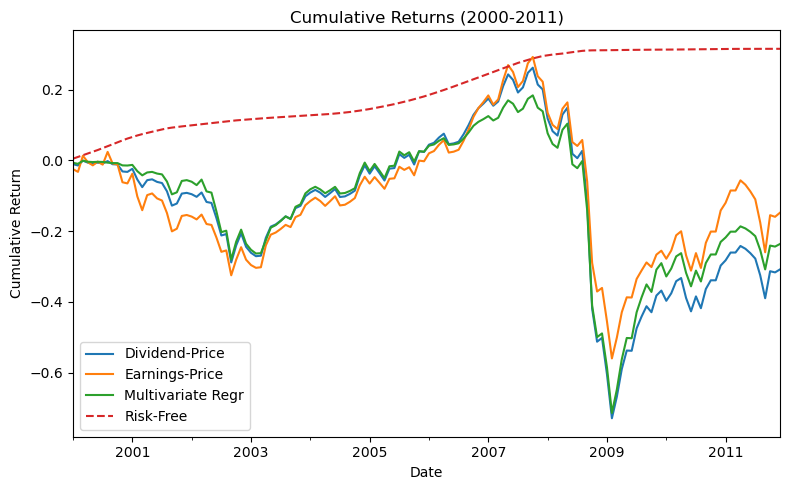

In [12]:
forecast_subsample = forecast_model.loc['2000':'2011']
plot_cols = ['Dividend-Price', 'Earnings-Price', 'Multivariate Regr']
forecast_subsample_cum = (forecast_subsample[plot_cols] + 1).cumprod() - 1

# Add risk-free as a dashed line (already de-annualized)
forecast_subsample_cum['Risk-Free'] = (forecast_subsample['Risk-Free'] + 1).cumprod() - 1

fig, ax = plt.subplots(figsize=(8, 5))
forecast_subsample_cum[plot_cols + ['Risk-Free']].plot(ax=ax, style=['-', '-', '-', '--'])
ax.set_title('Cumulative Returns (2000-2011)')
ax.set_ylabel('Cumulative Return')
ax.set_xlabel('Date')
fig.tight_layout()

- Using the performance metrics and cumulative return plots for the 2000-2011 subsample, we compare the dynamic portfolio strategies to the risk-free rate (3M T-Bill). The results show that the risk-free rate (when properly de-annualized to monthly) generally outperforms the dynamic strategies in terms of cumulative return and Sharpe ratio over this period.

- Short-term bonds outperformed equities during this period, as evidenced by the data: 3-month Treasury bills delivered a 2.28% annualized return, compared to 1.8% for SPY. Furthermore, each of the dynamic portfolio strategies lagged the risk-free rate, with annualized returns notably lower—and the dividend-price strategy even posting negative results.

- These outcomes are consistent with the broader macroeconomic environment, particularly the impact of the 2008 financial crisis.

### 4. Based on the regression estimates, in how many periods do we estimate a negative risk premium? That is, in how many periods is our forecasted excess return negative?

In [13]:
# Calculate the number of months with negative excess returns
# Subtract the risk-free rate from the forecasted returns

forecasted_excess_returns = forecast_df.sub(risk_free_df['TBill 3M'], axis=0)
negative_count = (forecasted_excess_returns < 0).sum()
print(negative_count)

Dividend-Price       42
Earnings-Price        1
Multivariate Regr    40
dtype: int64


### 5. Do you believe increased risk is behind the out-performance of $\tilde{r}^*$ and $\tilde{r}^{gmo}$?

In [14]:
from utils import calc_performance_metrics, calc_univariate_regression

# Check risk metrics for GMWAX.

display(calc_performance_metrics(total_returns_df[['GMWAX', 'GMGEX']]).T)
# Run regression for GMWAX and GMGEX on SPY
display(calc_univariate_regression(total_returns_df[['GMWAX']], total_returns_df[['SPY']]))
display(calc_univariate_regression(total_returns_df[['GMGEX']], total_returns_df[['SPY']]))



,GMWAX,GMGEX
Annualized Return,0.068311,0.023802
Annualized Volatility,0.102652,0.191033
Annualized Sharpe Ratio,0.665467,0.124598
Annualized Sortino Ratio,0.874064,0.116226
Skewness,-0.742122,-5.194295
Excess Kurtosis,2.79974,59.543001
VaR (0.05),-0.040435,-0.075489
CVaR (0.05),-0.065974,-0.126337
Min,-0.145129,-0.658652
Max,0.085656,0.124727


,Alpha,Beta,Downside Beta,R-Squared,Treynor Ratio,Information Ratio,Tracking Error
GMWAX,0.011822,0.547565,0.575842,0.675907,0.124755,0.202295,0.00487


,Alpha,Beta,Downside Beta,R-Squared,Treynor Ratio,Information Ratio,Tracking Error
GMGEX,-0.056959,0.782841,0.736241,0.398912,0.030405,-0.38458,0.012342


- $\tilde{r}^*$: No, all three dynamic strategies lagged SPY, showing lower average returns, negative alphas, and negative information ratios. Each strategy also exhibited higher volatility and larger maximum drawdowns, with betas close to 1. Overall, these strategies did not deliver superior performance; their increased risk did not result in better risk-adjusted returns.

- $\tilde{r}^{gmo}$: No, GMGEX also fell short compared to SPY. It had lower mean returns, greater volatility, a lower Sharpe ratio, more severe drawdowns, and a negative alpha. These results indicate that GMO’s outperformance was not due to taking on more risk, as risk-adjusted metrics remained unfavorable.

# 4 Extensions
**This section is not graded, and you do not need to submit your answers. This is only provided for those interested in further study.**

This section utilizes data in the file, `gmo_analysis_data.xlsx`.

Reconsider the problem above, of estimating (1) for $x$. The reported $R^2$ was the in-sample $R^2$–it examined how well the forecasts fit in the sample from which the parameters were estimated. Let's consider the out-of-sample r-squared. To do so, we need to do the following:

* Start at $t=60$.

* Estimate (1) only using data through time $t$.

* Use the estimated parameters of (1), along with $x_{t}$ to calculate the out-of-sample forecast for the following period, $t+1$.
$$ \hat{r}^{SPY}_{t+1} = \alpha^{t, SPY,x} + (\beta^{t, SPY,x})' x_t $$

* Calculate the $t+1$ forecast error,
$$ e^x_{t+1} = r^{SPY}_{t+1} - \hat{r}^{SPY}_{t+1} $$

* Move to $t=61$, and loop through the rest of the sample.

You now have the time-series of out-of-sample prediction errors, $e^x$.

Calculate the time-series of out-of-sample prediction errors $e^0$, which are based on the null forecast:
$$ \bar{r}^{SPY}_{t+1} = \frac{1}{t} \sum_{i=1}^{t} R^{SPY}_i $$
$$ e^0_{t+1} = r^{SPY}_{t+1} - \bar{r}^{SPY}_{t+1} $$


### 1. Report the out-of-sample $R^2$ :
$$ R^2_{OOS} = 1 - \frac{\sum_{t=61}^{T} (e^x_t)^2}{\sum_{t=61}^{T} (e^0_t)^2} $$

Note that unlike an in-sample r-squared, the out-of-sample r-squared can be anywhere between $(-\infty, 1]$.

Did this forecasting strategy produce a positive OOS r-squared?

In [15]:
# Your code here

### 2. Re-do problem 3.2 using this OOS forecast.
How much better/worse is the OOS Earnings-Price ratio strategy compared to the in-sample version of 3.2?

In [16]:
# Your code here